In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.shape

(20800, 5)

In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df=df.fillna('')

In [9]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
df['content'] = df['author']+' '+df['title']

In [11]:
df['content'] 

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

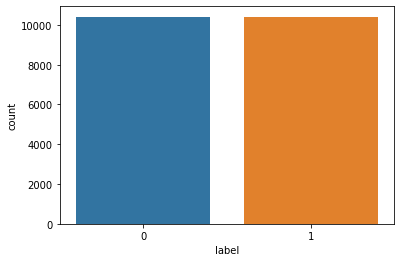

In [13]:
sns.countplot(x ='label', data = df)

In [14]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [15]:
X = df.drop('label',axis=1)

In [16]:
Y = df['label']

In [17]:
port_stem = PorterStemmer()

In [18]:
def stemming (content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    

In [19]:
df['content'] = df['content'].apply(stemming)

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x000001765AAD8318>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\nltk\data.py", line 1281, in __del__
    self.close()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nltk\data.py", line 1310, in close
    self.stream.close()
KeyboardInterrupt


In [20]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [28]:
X = df['content'].values
Y = df['label'].values
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [29]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [30]:
Y.shape

(20800,)

In [31]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

In [32]:
vectorizer.fit(X)
X = vectorizer.transform(X)

In [33]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# accuracy score on the training data
X_test_prediction = model.predict(X_train)

In [38]:
print(X_test_prediction)

[0 0 0 ... 0 0 1]


In [39]:
training_data_accuracy = accuracy_score(X_test_prediction,Y_train)

In [40]:
training_data_accuracy

0.9865985576923076

In [41]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [42]:

X_test_pred = model.predict(X_test)

In [43]:
test_data_accuracy = accuracy_score(X_test_pred,Y_test)

In [79]:
test_data_accuracy

0.9790865384615385

In [80]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [47]:
print(X_test[3])

  (0, 14632)	0.23337028911399943
  (0, 12693)	0.211577404470594
  (0, 11888)	0.25336998543209355
  (0, 11246)	0.340188979812318
  (0, 11217)	0.3302474074203597
  (0, 7668)	0.18748490820807126
  (0, 6868)	0.2729431954288567
  (0, 5529)	0.2895160407717208
  (0, 3782)	0.5146474416282095
  (0, 2806)	0.22586908309808348
  (0, 2510)	0.19575583865343715
  (0, 2407)	0.22941655373198824
  (0, 1894)	0.10717190161988106


In [ ]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

In [68]:
X_new = X_test[4]

In [69]:
prediction = model.predict(X_new)

In [70]:
print(prediction)

[0]


In [71]:
if(prediction[0]==0):
    print('news is real')
else:
    print('fake')

news is real
